### Testing of bloom filter hashing algorithms - do they improve name similarity calculations?

* For this evaluation use the names + nicknames tables that was used to simulate noise in the data
* Hypothesis: the distance between names and nicknames is shorter than the distance between unrelated names

In [93]:
import pandas as pd
import bitarray
import mmh3

In [95]:
# Hashing function to test
def bloom_hash(size, hash_count, item):
    bit_array = bitarray.bitarray(size)
    bit_array.setall(0)
    for ii in range(hash_count):
        index = mmh3.hash(item, ii) % size
        bit_array[index] = 1
    return bit_array

In [96]:
# similarity coefficient
def sum_digits(bits):
    digits = [int(x) for x in list(bits)]
    return sum(digits)

def dice_coeff(bits1, bits2):
    bits = list(zip(bits1, bits2))
    commons = sum([x[0] == x[1] for x in bits])
    return (2 * commons) / (sum_digits(bits1) + sum_digits(bits2))

In [97]:
# get data ready in the form [(name, list_names)]
names = pd.read_csv("../datasets/names_lookup.csv", header = None, delimiter = ";")
names["first"] = names[0].apply(lambda x: x.split(",")[0])
names["nicknames"] = names[0].apply(lambda x: x.split(",")[1:])
names.head(5)

,0,first,nicknames
0,"aaron,erin,ronnie,ron",aaron,"[erin, ronnie, ron]"
1,"abbigail,nabby,abby,gail,abbi,abbey",abbigail,"[nabby, abby, gail, abbi, abbey]"
2,"abednego,bedney",abednego,[bedney]
3,"abel,ebbie,ab,abe,eb",abel,"[ebbie, ab, abe, eb]"
4,"abiel,ab",abiel,[ab]


In [98]:
names_vs_nicknames = list(zip(names["first"].values, names["nicknames"].values)) 

In [99]:
names_for_comparison = []
for n in names["first"].values:
    nlist = list(names["first"].values)
    nlist.remove(n)
    names_for_comparison.append(nlist)
names_vs_names = list(zip(names["first"].values, names_for_comparison)) 

In [100]:
# Comparing function
def compare(names):
    coeffs = []
    for row in names:
        first_name = row[0]
        nicknames = row[1]
        for nickname in nicknames:
            bits1 = bloom_hash(20, 10, first_name)
            bits2 = bloom_hash(20, 10, nickname)
            coeffs.append(dice_coeff(bits1, bits2))
    return coeffs

In [81]:
results_nicknames = compare(names_vs_nicknames)
results_names = compare(names_vs_names)

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
hist1 = np.histogram(results_nicknames, bins = 10)
hist2 = np.histogram(results_names, bins = 10)

In [111]:
hist1[0]

array([ 25, 158, 395, 765, 568, 310,  96,  12,   0,   2])

<BarContainer object of 10 artists>

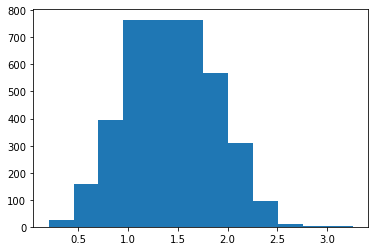

In [112]:
plt.bar(hist1[1][1:], hist1[0])

<BarContainer object of 10 artists>

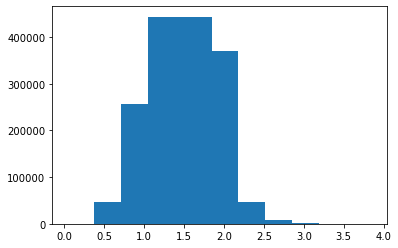

In [113]:
plt.bar(hist2[1][1:], hist2[0])